In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
df=pd.read_csv('BTC-USD.csv')
df.head

<bound method NDFrame.head of            Date          Open          High           Low         Close  \
0    2023-03-17  25055.123047  27787.812500  24955.169922  27423.929688   
1    2023-03-18  27448.117188  27725.953125  26636.261719  26965.878906   
2    2023-03-19  26969.503906  28440.560547  26907.716797  28038.675781   
3    2023-03-20  28041.601563  28527.724609  27242.880859  27767.236328   
4    2023-03-21  27768.392578  28439.562500  27439.646484  28175.816406   
..          ...           ...           ...           ...           ...   
362  2024-03-13  71482.117188  73637.476563  71334.093750  73083.500000   
363  2024-03-14  73079.375000  73750.070313  68563.023438  71396.593750   
364  2024-03-15  71387.875000  72357.132813  65630.695313  69403.773438   
365  2024-03-16  69392.484375  70046.273438  64801.394531  65315.117188   
366  2024-03-17  65258.347656  66510.632813  64887.535156  66339.984375   

        Adj Close       Volume  
0    27423.929688  50730261335  
1  

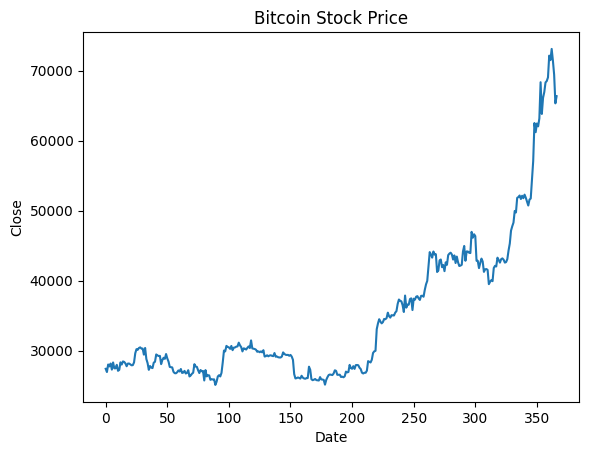

In [3]:
close=df['Close']
ax=close.plot(title="Bitcoin Stock Price")
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [4]:
df['Date']=pd.to_datetime(df["Date"],infer_datetime_format=True)

C:\Users\ravir\AppData\Local\Temp\ipykernel_12520\2532824917.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date']=pd.to_datetime(df["Date"],infer_datetime_format=True)


In [5]:
df['Date']=pd.to_datetime(df["Date"],infer_datetime_format=True)

C:\Users\ravir\AppData\Local\Temp\ipykernel_12520\2532824917.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date']=pd.to_datetime(df["Date"],infer_datetime_format=True)


In [6]:
data=df[['Date','Close']]

In [7]:
data=data.rename(columns={"Date":"ds","Close":"y"})

In [8]:
model=Prophet()
model.fit(data)
pred=model.make_future_dataframe(periods=365)
forcast=model.predict(pred)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

15:44:46 - cmdstanpy - INFO - Chain [1] start processing
15:44:46 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
727,2025-03-13,162081.889695,140403.074289,183570.925081
728,2025-03-14,162308.370499,140395.317718,184188.859604
729,2025-03-15,162423.343044,140372.215641,184178.210032
730,2025-03-16,162701.054123,140669.813205,184713.187862
731,2025-03-17,163132.121022,140250.610319,185483.282829


c:\Users\ravir\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\ravir\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


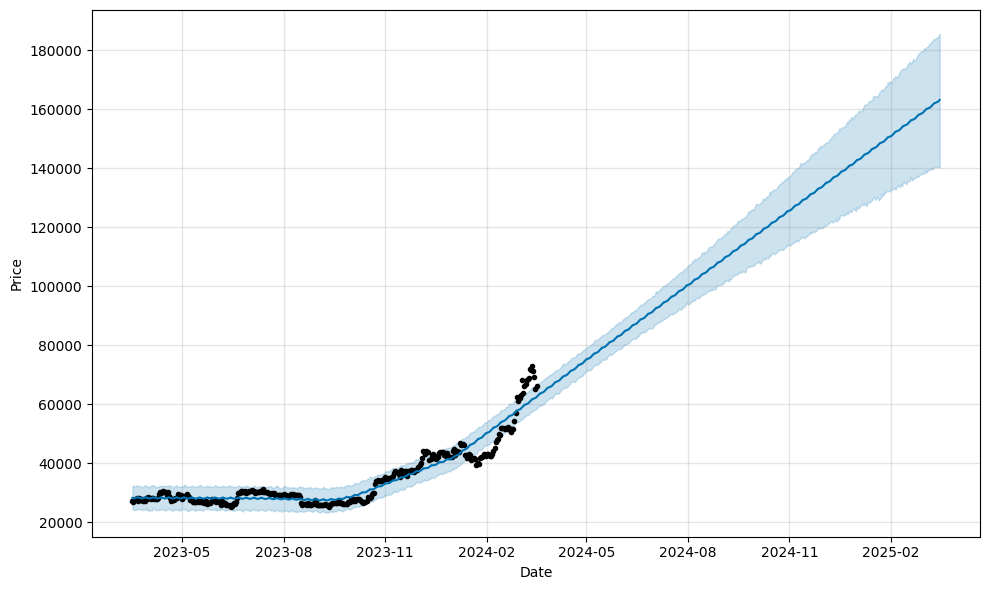

In [9]:
graph=model.plot(forcast,xlabel="Date",ylabel="Price")

In [10]:
evaluation_start_date = '2023-01-01'
evaluation_end_date = '2023-12-31'

actual_data = data[(data['ds'] >= evaluation_start_date) & (data['ds'] <= evaluation_end_date)]

merged_data = pd.merge(actual_data, forcast, on='ds')

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(merged_data['y'], merged_data['yhat'])
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 5.278660434079399
